In [117]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [118]:
consumer_goods_stocks = [
    "PG",  # Procter & Gamble
    "KO",  # Coca-Cola
    "PEP", # PepsiCo
    "CL",  # Colgate-Palmolive
    "GIS", # General Mills
    "KHC", # Kraft Heinz
    "UL",  # Unilever
    "NKE", # Nike
    "SBUX", # Starbucks
    "TSN"  # Tyson Foods
]

In [119]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [120]:
import yfinance as yf
import pandas as pd

# Define the date range
start_date = "2015-01-01"
end_date = "2025-01-01"

# Fetch stock data
stock_data = yf.download(consumer_goods_stocks, start=start_date, end=end_date)

# Display first few rows
print(stock_data.head())

[*********************100%***********************]  10 of 10 completed

Price           Close                                                  \
Ticker             CL        GIS KHC         KO        NKE        PEP   
Date                                                                    
2015-01-02  54.379501  37.507645 NaN  30.437500  42.140316  69.978600   
2015-01-05  53.977787  36.829685 NaN  30.437500  41.461853  69.452515   
2015-01-06  53.410686  36.737862 NaN  30.668636  41.217960  68.926430   
2015-01-07  53.836021  37.514694 NaN  31.051451  42.069378  70.941879   
2015-01-08  54.568542  38.126789 NaN  31.427046  43.040504  72.231216   

Price                                                   ...   Volume           \
Ticker             PG       SBUX        TSN         UL  ...       CL      GIS   
Date                                                    ...                     
2015-01-02  67.861984  33.345444  31.881908  28.457930  ...  2522800  2165000   
2015-01-05  67.539307  32.706715  31.147726  27.924084  ...  2950700  4149500   
2015-01-06

In [121]:
stock_data.head()

Price           Close                                                  \
Ticker             CL        GIS KHC         KO        NKE        PEP   
Date                                                                    
2015-01-02  54.379501  37.507645 NaN  30.437500  42.140316  69.978600   
2015-01-05  53.977787  36.829685 NaN  30.437500  41.461853  69.452515   
2015-01-06  53.410686  36.737862 NaN  30.668636  41.217960  68.926430   
2015-01-07  53.836021  37.514694 NaN  31.051451  42.069378  70.941879   
2015-01-08  54.568542  38.126789 NaN  31.427046  43.040504  72.231216   

Price                                                   ...   Volume           \
Ticker             PG       SBUX        TSN         UL  ...       CL      GIS   
Date                                                    ...                     
2015-01-02  67.861984  33.345444  31.881908  28.457930  ...  2522800  2165000   
2015-01-05  67.539307  32.706715  31.147726  27.924084  ...  2950700  4149500   
2015-01-06  67.231651  32.440563  31.331263  27.781713  ...  3437400  3036200   
2015-01-07  67.584328  33.238983  31.714327  28.080677  ...  2908000  3204200   
2015-01-08  68.357170  33.775356  32.879463  28.600302  ...  2745200  3998400   

Price                                                                   \
Ticker     KHC        KO      NKE      PEP       PG      SBUX      TSN   
Date                                                                     
2015-01-02 NaN   9921100  4985800  3545700  7251400   6886000  3225300   
2015-01-05 NaN  26292600  6889200  6441000  8626100  11623800  3809800   
2015-01-06 NaN  16897500  7576000  6195000  7791200   7664400  4562600   
2015-01-07 NaN  13412300  7256000  6526300  5986600   9732600  3600100   
2015-01-08 NaN  21743600  5978200  7131600  6823300  13170600  5632800   

Price                
Ticker           UL  
Date                 
2015-01-02   907700  
2015-01-05  1347000  
2015-01-06  1416000  
2015-01-07  1067100  
2015-01-08  1127900  

[5 rows x 50 columns]

In [122]:
adj_close_data = stock_data.xs("Close", level=0, axis=1).copy()
adj_close_data.dropna(inplace=True)

# Display final dataset
print(adj_close_data.head())

Ticker             CL        GIS        KHC         KO        NKE        PEP  \
Date                                                                           
2015-07-06  52.517670  40.594669  48.088287  28.945967  48.982327  70.936913   
2015-07-07  53.592564  41.527229  49.188999  29.555439  49.628956  72.439819   
2015-07-08  52.907825  41.165810  49.696510  29.269058  48.728146  71.846184   
2015-07-09  52.684887  41.151352  49.301048  29.313114  48.803959  71.079689   
2015-07-10  53.059109  41.397118  50.955399  29.658236  49.285583  71.801094   

Ticker             PG       SBUX        TSN         UL  
Date                                                    
2015-07-06  60.979565  44.778584  34.134739  30.651623  
2015-07-07  62.251740  44.836315  34.559704  30.846621  
2015-07-08  61.695633  44.020061  34.174828  30.731060  
2015-07-09  61.444260  44.564220  34.214920  31.063290  
2015-07-10  61.665169  44.992966  34.463501  32.247749  


In [123]:
adj_close_data.to_csv("consumer_goods_stock_data.csv")

In [124]:
data = pd.read_csv("consumer_goods_stock_data.csv", index_col=False)  # Ensure Date is read
print("Columns:", data.columns)


Columns: Index(['Date', 'CL', 'GIS', 'KHC', 'KO', 'NKE', 'PEP', 'PG', 'SBUX', 'TSN',
       'UL'],
      dtype='object')


In [125]:
data.head()

,Date,CL,GIS,KHC,KO,NKE,PEP,PG,SBUX,TSN,UL
0,2015-07-06,52.517670,40.594669,48.088287,28.945967,48.982327,70.936913,60.979565,44.778584,34.134739,30.651623
1,2015-07-07,53.592564,41.527229,49.188999,29.555439,49.628956,72.439819,62.251740,44.836315,34.559704,30.846621
2,2015-07-08,52.907825,41.165810,49.696510,29.269058,48.728146,71.846184,61.695633,44.020061,34.174828,30.731060
3,2015-07-09,52.684887,41.151352,49.301048,29.313114,48.803959,71.079689,61.444260,44.564220,34.214920,31.063290
4,2015-07-10,53.059109,41.397118,50.955399,29.658236,49.285583,71.801094,61.665169,44.992966,34.463501,32.247749


In [126]:
# data.reset_index(inplace=True)
# data["Date"] = pd.to_datetime(data["Date"])

In [127]:
# loading the dataset

In [128]:
#file = "/Users/s.v.ssaisreenivas/Datasets/stocks.csv"

In [129]:
#data = pd.read_csv(file)

In [130]:
# Basic info

In [131]:
# print("Data head :\n", data.head())
# print("Data tail :\n", data.tail())
# print("\nData info:\n")
# data.info()
# print("\nMissing values:\n", data.isnull().sum())

In [132]:
# convert date to date-time format

In [133]:
# data.index = pd.to_datetime(data.index)

In [134]:
# data.head()

In [135]:
# printing datatypes and unique companies

In [136]:
# print("Data types:\n", data.dtypes)
# print("\nUnique companies:", data["Ticker"].unique())

In [137]:
# Group data by companies

In [138]:
# grouped_data = data.groupby("Ticker")

In [139]:
# Basic stats

In [140]:
# stats = grouped_data["Close"].agg(["mean", "median", "std"])

In [141]:
#stats = data.agg(["mean", "median", "std"])

In [142]:
#print("Basic stats for each company:\n", stats)

In [143]:
stats = data.drop(columns=['Date'], errors='ignore').agg(["mean", "median", "std"])
print(stats)

               CL        GIS        KHC         KO        NKE         PEP  \
mean    67.308841  52.575794  38.767530  45.181662  87.202541  120.973887   
median  64.636124  50.626308  34.438478  43.766369  82.162277  116.706776   
std     11.586552  12.344054  12.500853  10.714911  31.036619   33.889221   

                PG       SBUX        TSN         UL  
mean    107.136694  72.300140  58.374651  44.633829  
median  108.161785  73.835178  56.759405  45.553928  
std      35.188850  21.143564  11.008757   7.257305  


In [144]:
# plotting stock prices over time for each company

In [145]:
# plt.figure(figsize=(12,6))
# for ticker in data["Ticker"].unique():
#     company_data = data[data["Ticker"] == ticker]
#     plt.plot(company_data["Date"], company_data["Close"], label=ticker)

# plt.title('Stock Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.grid(True)
# plt.savefig("stock price over time.jpg") # You can also use 'plot.pdf', 'plot.jpg', etc.
# plt.show()

In [173]:
print("Columns in dataset:", data.columns)

Columns in dataset: Index(['CL', 'GIS', 'KHC', 'KO', 'NKE', 'PEP', 'PG', 'SBUX', 'TSN', 'UL'], dtype='object')


In [175]:
print(data.index)

DatetimeIndex(['2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
               '2015-07-10', '2015-07-13', '2015-07-14', '2015-07-15',
               '2015-07-16', '2015-07-17',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=2390, freq=None)


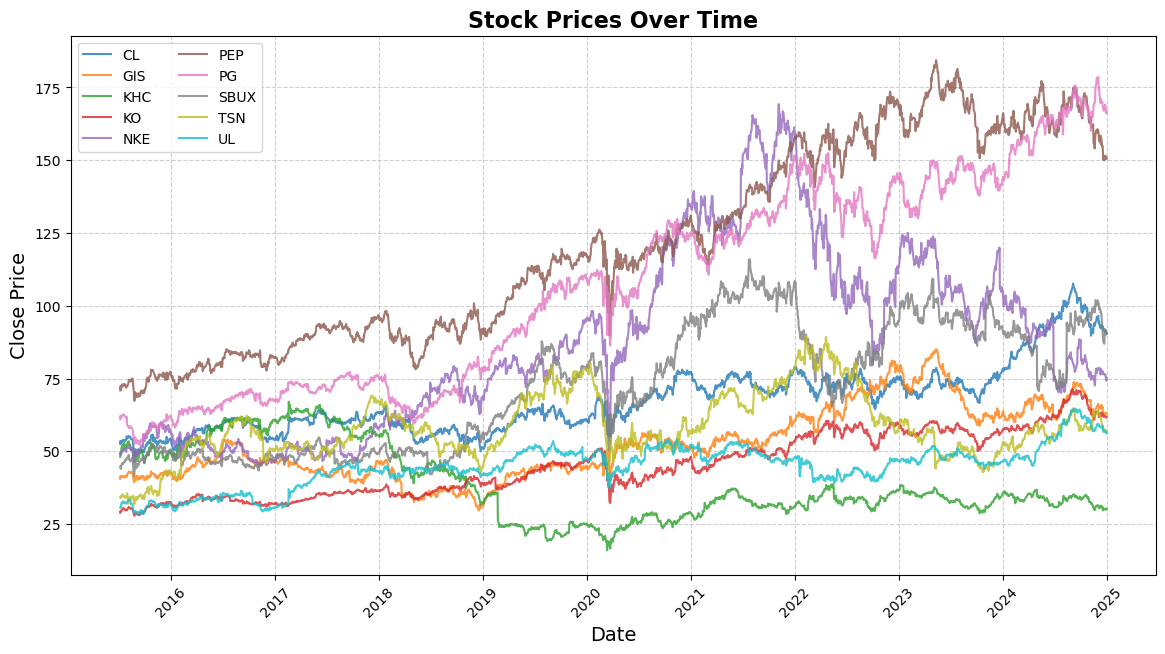

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 7))

# Use a Seaborn color palette
colors = sns.color_palette("tab10", n_colors=len(data.columns))

# Plot each stock with better styling
for i, column in enumerate(data.columns):
    plt.plot(data.index, data[column], label=column, color=colors[i], linewidth=1.5, alpha=0.8)

# Improve aesthetics
plt.title('Stock Prices Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.legend(loc="upper left", fontsize=10, ncol=2, frameon=True)  # Adjust legend
plt.grid(True, linestyle="--", alpha=0.6)  # Use dashed grid lines
plt.savefig("stock price over time.jpg")
# Show the plot
plt.show()

In [193]:
from IPython.display import FileLink
FileLink("stock price over time.jpg")


/Users/s.v.ssaisreenivas/projects/Data analysis/Stock analysis/stock price over time.jpg

In [195]:
# calculating daily returns

In [203]:
daily_returns = data.pct_change()

daily_returns.head()

,CL,GIS,KHC,KO,NKE,PEP,PG,SBUX,TSN,UL
Date,,,,,,,,,,
2015-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-07,0.020467,0.022972,0.022889,0.021056,0.013201,0.021187,0.020862,0.001289,0.012450,0.006362
2015-07-08,-0.012777,-0.008703,0.010318,-0.009690,-0.018151,-0.008195,-0.008933,-0.018205,-0.011137,-0.003746
2015-07-09,-0.004214,-0.000351,-0.007958,0.001505,0.001556,-0.010669,-0.004074,0.012362,0.001173,0.010811
2015-07-10,0.007103,0.005972,0.033556,0.011774,0.009869,0.010149,0.003595,0.009621,0.007265,0.038131


In [207]:
daily_returns .dropna(inplace = True)
daily_returns .head()

,CL,GIS,KHC,KO,NKE,PEP,PG,SBUX,TSN,UL
Date,,,,,,,,,,
2015-07-07,0.020467,0.022972,0.022889,0.021056,0.013201,0.021187,0.020862,0.001289,0.012450,0.006362
2015-07-08,-0.012777,-0.008703,0.010318,-0.009690,-0.018151,-0.008195,-0.008933,-0.018205,-0.011137,-0.003746
2015-07-09,-0.004214,-0.000351,-0.007958,0.001505,0.001556,-0.010669,-0.004074,0.012362,0.001173,0.010811
2015-07-10,0.007103,0.005972,0.033556,0.011774,0.009869,0.010149,0.003595,0.009621,0.007265,0.038131
2015-07-13,0.012005,0.004365,0.019661,0.006685,0.017101,0.017478,0.011859,0.020707,0.017217,-0.001120


In [ ]:
# Measuring stock Volatilility

In [223]:
volatility = daily_returns.std()
print("Stock Volatility (Standard Deviation of Daily Returns):\n", volatility)

Stock Volatility (Standard Deviation of Daily Returns):
 CL      0.012073
GIS     0.013411
KHC     0.016996
KO      0.011342
NKE     0.019037
PEP     0.011873
PG      0.011772
SBUX    0.017915
TSN     0.018046
UL      0.013505
dtype: float64


In [227]:
# Convert volatility Series into a DataFrame
volatility_df = volatility.reset_index()
volatility_df.columns = ["Ticker", "Volatility"]  # Rename columns

In [231]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x="Ticker", y="Daily Return", data=data)
# plt.title("Stock Return Volatility Comparison")
# plt.xlabel("Company")
# plt.ylabel("Daily Returns")
# plt.savefig("Stock Return Volatility Comparison.jpg")
# plt.grid(True)


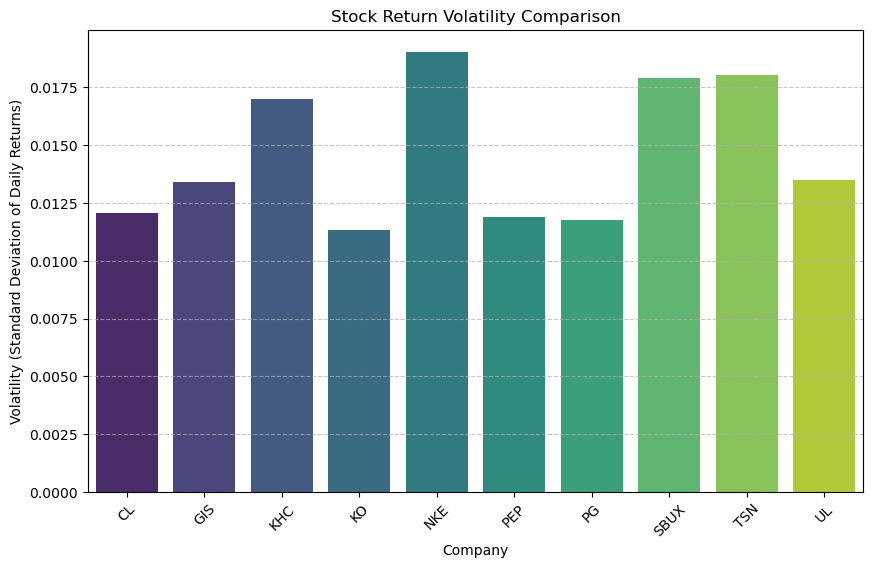

In [237]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Ticker", y="Volatility", hue="Ticker", data=volatility_df, palette="viridis", legend=False)

plt.xticks(rotation=45)  
plt.title("Stock Return Volatility Comparison")
plt.xlabel("Company")
plt.ylabel("Volatility (Standard Deviation of Daily Returns)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig("Stock Return Volatility Comparison.jpg", bbox_inches="tight")
plt.show()

In [239]:
FileLink("Stock Return Volatility Comparison.jpg")

/Users/s.v.ssaisreenivas/projects/Data analysis/Stock analysis/Stock Return Volatility Comparison.jpg

In [ ]:
# Creating a pivot table

In [245]:
# returns_pivot = data.pct_change().dropna()  # Already indexed by 'Date'
# returns_pivot.head()

In [ ]:
# Calculating correlation matrix

In [247]:
correlation_matrix = daily_returns.corr()
correlation_matrix

,CL,GIS,KHC,KO,NKE,PEP,PG,SBUX,TSN,UL
CL,1.000000,0.499457,0.431450,0.608246,0.305345,0.680909,0.725374,0.359361,0.285664,0.529755
GIS,0.499457,1.000000,0.519867,0.453384,0.193660,0.545416,0.514516,0.191590,0.270244,0.329343
KHC,0.431450,0.519867,1.000000,0.478433,0.252891,0.518229,0.447180,0.304228,0.276317,0.381540
KO,0.608246,0.453384,0.478433,1.000000,0.385110,0.741210,0.623912,0.421585,0.346036,0.456717
NKE,0.305345,0.193660,0.252891,0.385110,1.000000,0.356187,0.339532,0.509984,0.244276,0.330207
PEP,0.680909,0.545416,0.518229,0.741210,0.356187,1.000000,0.701188,0.441506,0.334139,0.493186
PG,0.725374,0.514516,0.447180,0.623912,0.339532,0.701188,1.000000,0.358600,0.259678,0.515182
SBUX,0.359361,0.191590,0.304228,0.421585,0.509984,0.441506,0.358600,1.000000,0.302330,0.349381
TSN,0.285664,0.270244,0.276317,0.346036,0.244276,0.334139,0.259678,0.302330,1.000000,0.268317
UL,0.529755,0.329343,0.381540,0.456717,0.330207,0.493186,0.515182,0.349381,0.268317,1.000000


In [ ]:
# Visualising using a heatmap

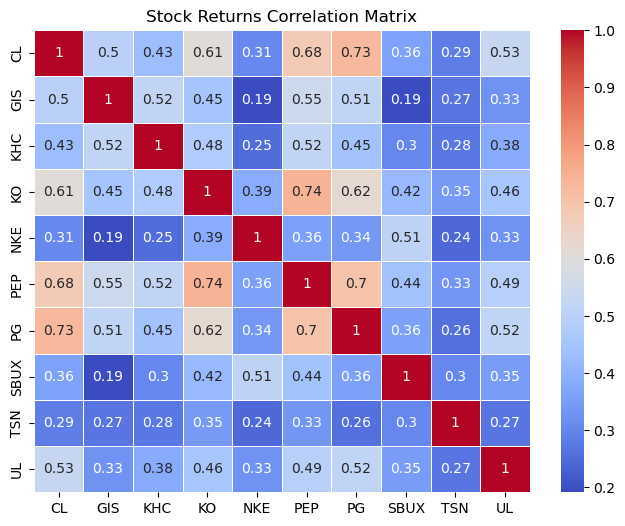

In [249]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Stock Returns Correlation Matrix")
plt.savefig("Stock Returns Correlation Matrix.jpg")

In [251]:
FileLink("Stock Returns Correlation Matrix.jpg")

/Users/s.v.ssaisreenivas/projects/Data analysis/Stock analysis/Stock Returns Correlation Matrix.jpg

In [263]:
num_stocks = len(data.columns)

In [265]:
num_stocks

10

In [267]:
# Generating random weights and normalising the sum to 1

In [269]:
weights = np.random.random(num_stocks)

In [271]:
weights /= np.sum(weights)

In [273]:
print("Portfolio weights : ", weights)

Portfolio weights :  [0.12379631 0.03789987 0.11308007 0.00991302 0.12502859 0.05410842
 0.12062937 0.12598564 0.11862966 0.17092904]


In [275]:
# portfolio returns

In [277]:
mean_daily_returns = daily_returns.mean()

In [279]:
mean_daily_returns

CL      0.000300
GIS     0.000275
KHC    -0.000046
KO      0.000382
NKE     0.000362
PEP     0.000386
PG      0.000490
SBUX    0.000455
TSN     0.000378
UL      0.000345
dtype: float64

In [281]:
portfolio_return = np.dot(weights, mean_daily_returns)

In [283]:
print("Expected portfolio returns =", portfolio_return)

Expected portfolio returns = 0.00033263904995033746


In [285]:
# portfolio risk

In [287]:
cov_matrix = daily_returns.cov() # # Cov matrix returns the relation between two stocks if they are travelling together or inversely

In [289]:
cov_matrix # +ve - stocks move together - more risk in portfolio ; -ve - move opposite - not risky; 0 - are indipendent - no effect

,CL,GIS,KHC,KO,NKE,PEP,PG,SBUX,TSN,UL
CL,0.000146,0.000081,0.000089,0.000083,0.000070,0.000098,0.000103,0.000078,0.000062,0.000086
GIS,0.000081,0.000180,0.000118,0.000069,0.000049,0.000087,0.000081,0.000046,0.000065,0.000060
KHC,0.000089,0.000118,0.000289,0.000092,0.000082,0.000105,0.000089,0.000093,0.000085,0.000088
KO,0.000083,0.000069,0.000092,0.000129,0.000083,0.000100,0.000083,0.000086,0.000071,0.000070
NKE,0.000070,0.000049,0.000082,0.000083,0.000362,0.000081,0.000076,0.000174,0.000084,0.000085
PEP,0.000098,0.000087,0.000105,0.000100,0.000081,0.000141,0.000098,0.000094,0.000072,0.000079
PG,0.000103,0.000081,0.000089,0.000083,0.000076,0.000098,0.000139,0.000076,0.000055,0.000082
SBUX,0.000078,0.000046,0.000093,0.000086,0.000174,0.000094,0.000076,0.000321,0.000098,0.000085
TSN,0.000062,0.000065,0.000085,0.000071,0.000084,0.000072,0.000055,0.000098,0.000326,0.000065
UL,0.000086,0.000060,0.000088,0.000070,0.000085,0.000079,0.000082,0.000085,0.000065,0.000182


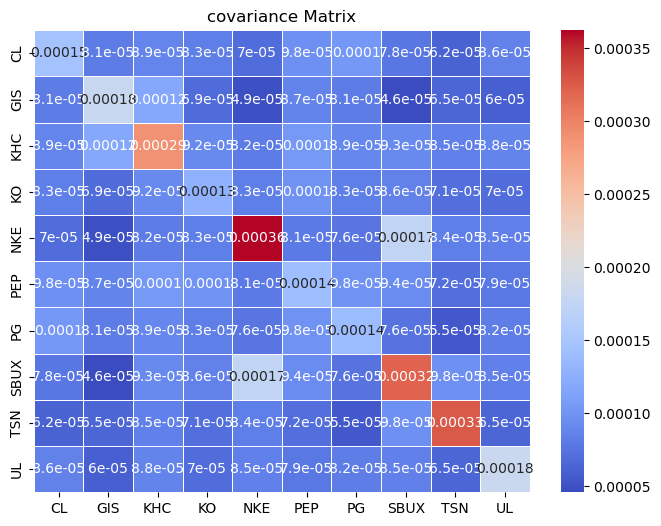

In [291]:
plt.figure(figsize=(8,6))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("covariance Matrix")
plt.savefig("covariance Matrix.jpg")

In [293]:
FileLink("covariance Matrix.jpg")

/Users/s.v.ssaisreenivas/projects/Data analysis/Stock analysis/covariance Matrix.jpg

In [295]:
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [297]:
print("Portfolio volatility(Risk) = ",portfolio_volatility)

Portfolio volatility(Risk) =  0.010183565432296753


In [299]:
# Sharpe ratio

In [445]:
risk_free_rate = 0.0002924 # daily risk free rate in india

In [447]:
sharpe_ratio = (portfolio_return - risk_free_rate)/portfolio_volatility

In [449]:
print("Sharpe ratio = ",sharpe_ratio)

Sharpe ratio =  0.003951371473759179


In [451]:
# Finding optimal portfolio

In [453]:
num_portfolios = 10000

In [455]:
p_weights = np.random.random((num_portfolios,10))

In [457]:
p_weights # Each row is different portfolio; Each column is a weight

array([[0.0576649 , 0.82688253, 0.33879798, ..., 0.49429992, 0.29400112,
        0.1299925 ],
       [0.56920261, 0.28632683, 0.14232574, ..., 0.13667996, 0.41952108,
        0.07542745],
       [0.92895459, 0.66885193, 0.21877418, ..., 0.55023173, 0.07406019,
        0.83466072],
       ...,
       [0.19405853, 0.99804979, 0.26263494, ..., 0.17830134, 0.16258641,
        0.88677101],
       [0.59251128, 0.42700987, 0.06617811, ..., 0.95274067, 0.71035405,
        0.05064499],
       [0.78285797, 0.49688063, 0.77439672, ..., 0.82541599, 0.7167945 ,
        0.07369206]])

In [459]:
p_weights /= np.sum(p_weights, axis=1, keepdims=True) # we are adding all elements of a row using axis 1 and using keepdims we are keeping the dimension as it is without it being reduced

In [461]:
p_weights # normalised

array([[0.01591725, 0.22824442, 0.09351842, ..., 0.13644163, 0.08115314,
        0.03588183],
       [0.14136507, 0.07111108, 0.0353475 , ..., 0.03394533, 0.10419072,
        0.01873288],
       [0.15481639, 0.11146857, 0.03646016, ..., 0.09169974, 0.01234262,
        0.1391017 ],
       ...,
       [0.03936471, 0.20245407, 0.05327541, ..., 0.03616837, 0.0329806 ,
        0.17988121],
       [0.1429987 , 0.10305602, 0.01597165, ..., 0.22993769, 0.17143928,
        0.01222283],
       [0.14200533, 0.09013091, 0.14047052, ..., 0.14972508, 0.13002185,
        0.01336726]])

In [463]:
p_return = np.dot(p_weights, mean_daily_returns)

In [465]:
p_return

array([0.00032947, 0.00036883, 0.00035417, ..., 0.00034627, 0.00036866,
       0.0003144 ])

In [467]:
p_volatility = np.sqrt(np.einsum("ij,jk,ik->i", p_weights, cov_matrix, p_weights)) # verify einsum (used for summations over multiple dimensions)

In [469]:
p_volatility

array([0.01006108, 0.0100034 , 0.01000588, ..., 0.00971438, 0.01034042,
       0.01034165])

In [471]:
p_sharpe_ratios = (p_return - risk_free_rate)/p_volatility

In [473]:
p_sharpe_ratios

array([0.00368449, 0.00764051, 0.00617341, ..., 0.00554565, 0.00737469,
       0.00212688])

In [475]:
max_sharpe_idx = np.argmax(p_sharpe_ratios)
min_risk_idx = np.argmin(p_volatility)

In [477]:
max_sharpe_idx

4273

In [479]:
min_risk_idx

1515

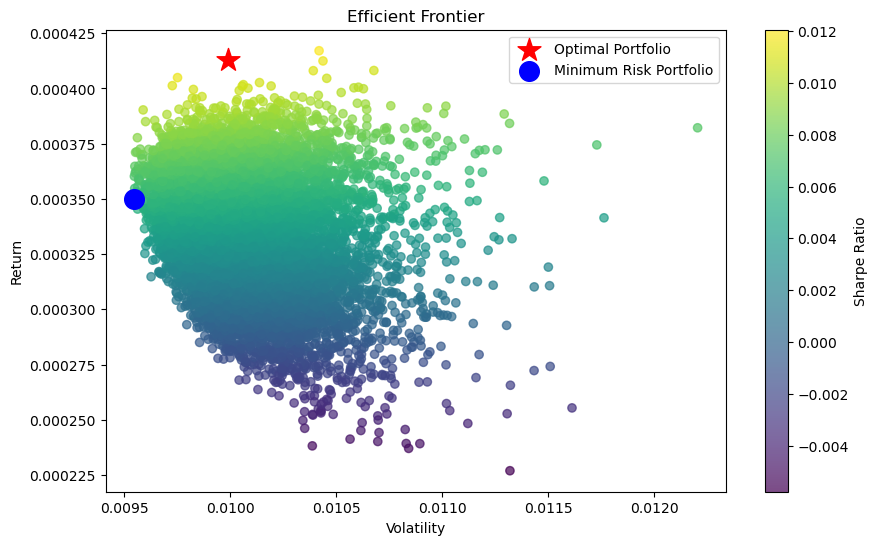

In [481]:
plt.figure(figsize=(10, 6))
plt.scatter(p_volatility, p_return, c=p_sharpe_ratios, cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')

plt.scatter(p_volatility[max_sharpe_idx], p_return[max_sharpe_idx], 
            color='red', marker='*', s=300, label="Optimal Portfolio")
plt.scatter(p_volatility[min_risk_idx], p_return[min_risk_idx], 
            color='blue', marker='o', s=200, label="Minimum Risk Portfolio")

plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend()
plt.savefig("Efficient Frontier.jpg")
plt.show()

In [482]:
FileLink("Efficient Frontier.jpg")

/Users/s.v.ssaisreenivas/projects/Data analysis/Stock analysis/Efficient Frontier.jpg

In [485]:
# Finding Tangency Portfolio ( balance between high sharpe rate and low risk)

In [487]:
excess_returns = mean_daily_returns - risk_free_rate

In [489]:
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [491]:
t_weights = inv_cov_matrix @ excess_returns # @ - used for matrix multiplication
t_weights /= np.sum(t_weights)  # Normalize weights to sum to 1

In [493]:
t_return = np.dot(t_weights, mean_daily_returns)
t_volatility = np.sqrt(t_weights.T @ cov_matrix @ t_weights)


In [495]:
t_sharpe_ratio = (t_return - risk_free_rate) / t_volatility

In [497]:
print("Tangency Portfolio Weights:", t_weights)
print("Tangency Portfolio Return:", t_return)
print("Tangency Portfolio Volatility:", t_volatility)
print("Tangency Portfolio Sharpe Ratio:", t_sharpe_ratio)

Tangency Portfolio Weights: [-2.09440201  0.11832284 -2.33013288  0.63423037 -0.22898828  0.56418988
  3.34147842  0.57977145  0.29217218  0.12335802]
Tangency Portfolio Return: 0.0019418406551731087
Tangency Portfolio Volatility: 0.041768191633181934
Tangency Portfolio Sharpe Ratio: 0.0394903535604051
